# Iris Plant Classification

# STEP 0: PROBLEM STATEMENT

# Predict the class of an Iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes representing class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

# STEP 1: IMPORT LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
# After importing the data, I typically view the first few rows using head() to get familiar with the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris['Species'].replace('setosa', 'Iris-setosa', inplace= True)
iris['Species'].replace('virginica', 'Iris-virginica', inplace= True)
iris['Species'].replace('versicolor', 'Iris-versicolor', inplace= True)
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# STEP 2: Exploratory Data Analysis

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


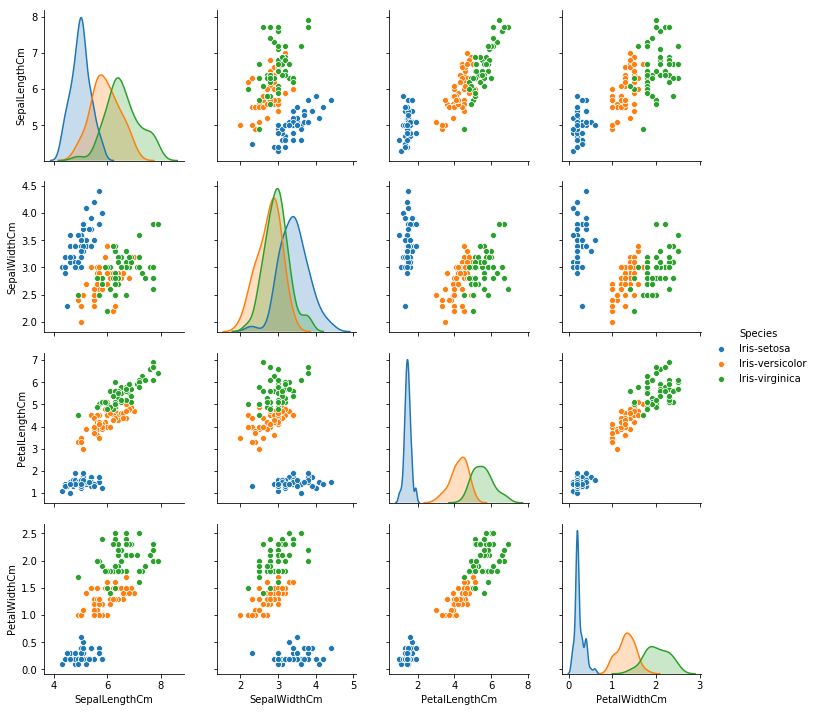

In [7]:
# Here, I do a pairplot to look at these characteristics for each class usingg scatterplots. 

sns.pairplot(data = iris, hue = 'Species')

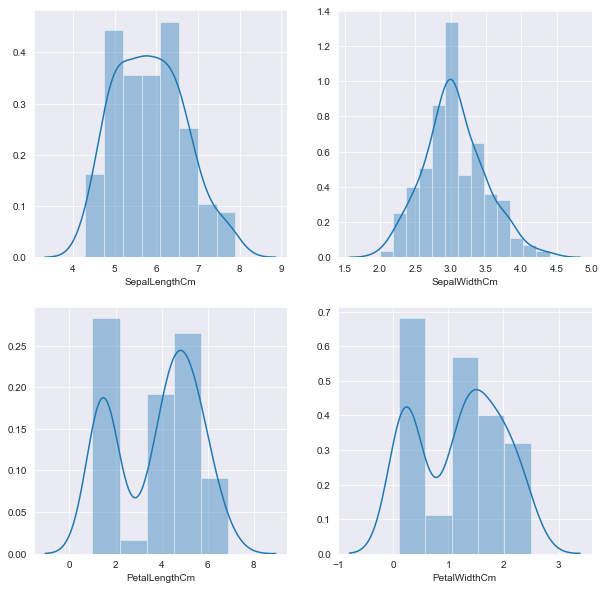

In [8]:
# Here, to look at the distribution of all feature variables, we used distplot()
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.distplot(a=iris['SepalLengthCm'])

plt.subplot(2,2,2)
sns.distplot(a=iris['SepalWidthCm'])

plt.subplot(2,2,3)
sns.distplot(a=iris['PetalLengthCm'])

plt.subplot(2,2,4)
sns.distplot(a=iris['PetalWidthCm'])

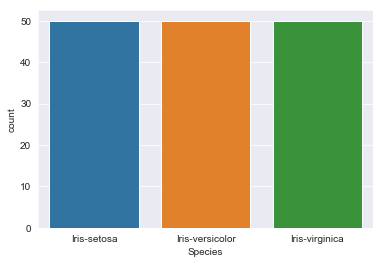

In [9]:
# Here, we used countplot() to visualize the value counts in target variable.
sns.countplot(data= iris, x= 'Species' )

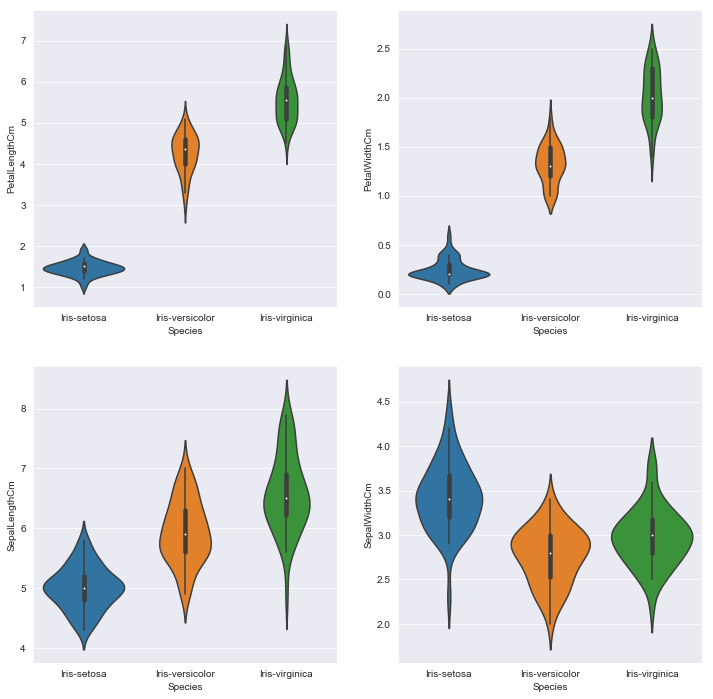

In [10]:
#  Here, I used violinplot() to view the mean and spread of data across each class for features like Petal length and width & Sepal length and width

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.violinplot(data=iris, x='Species',y='PetalLengthCm')

plt.subplot(2,2,2)
sns.violinplot(data=iris, x='Species',y='PetalWidthCm')

plt.subplot(2,2,3)
sns.violinplot(data=iris, x='Species',y='SepalLengthCm')

plt.subplot(2,2,4)
sns.violinplot(data=iris, x='Species',y='SepalWidthCm')

* The graphs reveal a smaller mean Petal length and width for the Setosa class and quite a bit of variation between the three classess.
* On the other  hand, there is less variation with Sepal length and width.

In [11]:
# A HEATMAP IS ALSO HELPFUL WHEN USED WITH CORR() TO LOOK FOR CORRELATIONS

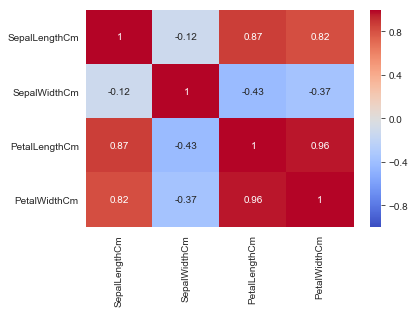

In [12]:
# A Heatmap is also helpful when used with corr() to look for correlation
sns.heatmap(data = iris.corr(), annot= True, cmap= 'coolwarm', vmin= -1 , vmax= 1)

# STEP 3: Data Prepration for Application of ML Models

## Standardize the Feature Variables

In [13]:
# After I'm comfortable with the data, I proceed to separate the data and drop any columns not needed
# I'm basically isolating the features for Model training in this step as "X" 
X = iris.drop(labels= 'Species', axis= 1)

# Here I identify the Target Variable and set it as "y"
y = iris['Species']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scalar = StandardScaler()
scalar.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scalar.transform(X)

In [17]:
df_feat = pd.DataFrame(scaled_features,columns= iris.columns[:-1])
df_feat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Separation of data into Training and Testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# I usually use 25% for test size, but in this case, I'm going to use it 30%. Since, total data size is very less.
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.30, random_state= 25)

In [20]:
# Training data shape
X_train.shape

(105, 4)

In [21]:
# Testing data shape
X_test.shape

(45, 4)

In [22]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,-0.537178,1.479398,-1.283389,-1.315444
33,-0.416010,2.630382,-1.340227,-1.315444
78,0.189830,-0.362176,0.421734,0.395774
27,-0.779513,1.019004,-1.283389,-1.315444
121,-0.294842,-0.592373,0.649083,1.053935


In [23]:
y_train.head()

10         Iris-setosa
33         Iris-setosa
78     Iris-versicolor
27         Iris-setosa
121     Iris-virginica
Name: Species, dtype: object

# STEP 4: TRAINING THE MODEL

In [24]:
# Now that the data is ready and I have it separated into training and testing data, I can create the k-nearest neighbor classifier
# I chose KNN because we are dealing with labeled data and three distinct classes. By using k =  2, I am asking the model to compare any new observation to 2 exixsting ones and essentially 'take a vote' if it should belong to that group or another (k = 2 is a good middle of the road number, anything smaller and we may overfitt, and boundaries become smoother with a larger k)

from sklearn.neighbors import KNeighborsClassifier

In [25]:
classifier = KNeighborsClassifier(n_neighbors= 2, metric= 'minkowski')
classifier.fit(X = X_train, y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

# STEP 5: EVALUATING THE MODEL

In [26]:
y_prediction = classifier.predict(X = X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

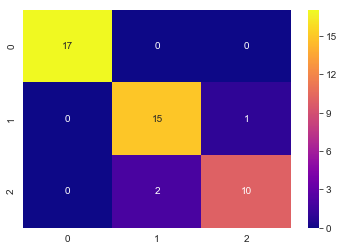

In [28]:
sns.heatmap(data = confusion_matrix(y_true= y_test, y_pred= y_prediction), annot= True, \
            cmap = 'plasma')

In [29]:
print(classification_report(y_true= y_test, y_pred= y_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.91      0.83      0.87        12

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.92      0.93        45
   weighted avg       0.93      0.93      0.93        45



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [30]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    classifier = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

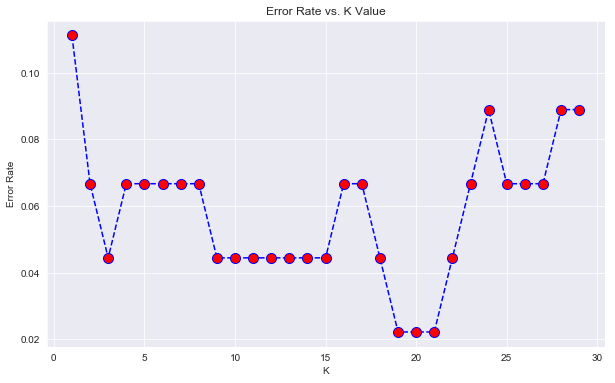

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', \
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# NOW WITH K = 19
classifier = KNeighborsClassifier(n_neighbors= 19, metric= 'minkowski')
classifier.fit(X = X_train, y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

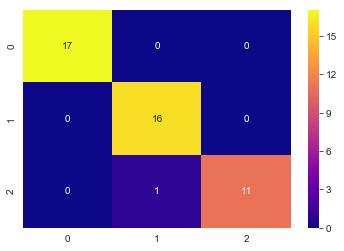

In [33]:
y_prediction = classifier.predict(X = X_test)
sns.heatmap(data = confusion_matrix(y_true= y_test, y_pred= y_prediction), annot= True, \
            cmap = 'plasma')

In [34]:
print(classification_report(y_true= y_test, y_pred= y_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.92      0.96        12

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



* The Classification Report shows 98% precision, too. This is good news!
  This means the Model is highly accurate.